In [1]:
# Importamos las librerias que necesitamos
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Introducción a redes neuronales

En este notebook implementamos una red neuronal con PyTorch capaz de reconocer digitos escritos a mano.

## Base de datos

Para este proyecto, utilizaremos la popular base de datos MNIST. Se trata de una colección de 70000 dígitos manuscritos divididos en conjuntos de entrenamiento y prueba de 60000 y 10000 imágenes respectivamente.

In [2]:
# Primero definimos las transformaciones que queremos realizar a nuestros datos
transform = transforms.Compose([transforms.ToTensor()
                              #,transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
# importa datos de entrenamiento y de prueba
trainset = datasets.MNIST('./tdatos', download=True, train=True, transform=transform)
valset = datasets.MNIST('./pdatos', download=True, train=False, transform=transform)
# divide la base de datos en baches de 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:02<00:00, 4384572.73it/s]


Extracting ./tdatos/MNIST/raw/train-images-idx3-ubyte.gz to ./tdatos/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 5648668.40it/s]


Extracting ./tdatos/MNIST/raw/train-labels-idx1-ubyte.gz to ./tdatos/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2656313.97it/s]


Extracting ./tdatos/MNIST/raw/t10k-images-idx3-ubyte.gz to ./tdatos/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1221971.06it/s]

Extracting ./tdatos/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./tdatos/MNIST/raw



100%|██████████| 9912422/9912422 [00:01<00:00, 5002150.77it/s]


Extracting ./pdatos/MNIST/raw/train-images-idx3-ubyte.gz to ./pdatos/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1514480.14it/s]


Extracting ./pdatos/MNIST/raw/train-labels-idx1-ubyte.gz to ./pdatos/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2370809.72it/s]


Extracting ./pdatos/MNIST/raw/t10k-images-idx3-ubyte.gz to ./pdatos/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2076804.62it/s]

Extracting ./pdatos/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./pdatos/MNIST/raw



## Construcción de la red neuronal

El módulo torch.nn de PyTorch nos permite construir la red anterior de forma muy sencilla. 

El nn.Sequential envuelve las capas de la red. Hay tres capas lineales y usamos la función de activación ReLU, una función simple con la siguiente forma. 
$$\text{ReLU}(x)=(x)^{+}=\text{max}(0,x)$$
Basicamente permite que los valores positivos pasen mientras que los negativos los vuelve 0.

La capa de salida es una capa lineal con activación Softmax porque se trata de un problema de clasificación en varias variables. La función Softmax se ve de la siguiente forma
$$\text{Softmax}(x_i)=\frac{\text{exp}(x_i)}{\sum_j\text{exp}(x_j)}$$

In [4]:
# definimos la red neuronal
class RedNeuronal(nn.Module):
    def __init__(self):
        super().__init__()
        self.red = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.Softmax(dim=1))
    def forward(self, x: torch.Tensor):
        return self.red(x)

### Definición del error

Nuestra función de error va a ser la entropia cruzada multiclase
$$-\sum_ct_c\text{log}(p_c)$$
Donde $t_c$ son los datos de entrenamiento y $p_c$ los datos otorgados por nuestro modelo

In [5]:
def funcion_de_error(y: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
    loss = torch.nn.CrossEntropyLoss()
    return loss(y, t)

### Entrenar la red

La red neuronal itera sobre el conjunto de entrenamiento y actualiza los pesos, usando el descenso por la gradiente. Así, en cada época, veremos una disminución gradual del error.

In [6]:
def entrenar_red()->RedNeuronal:
    # Se crea una instancia de la clase 
    red_neuronal = RedNeuronal()
    # Un módulo proporcionado por PyTorch para optimizar el modelo
    optimizer = optim.SGD(red_neuronal.parameters(), lr=0.003, momentum=0.9)
    epochs = 15
    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            # Aplana las imagenes de la base de datos
            images = images.view(images.shape[0], -1)
        
            # Vacia el gradiante en cada iteración
            optimizer.zero_grad()
            
            output = red_neuronal(images)
            loss = funcion_de_error(output, labels)
            
            #Aquí es donde el modelo aprende por retropropagación
            loss.backward()
            
            #Da un paso y optimiza los pesos
            optimizer.step()
            
            running_loss += loss.item()
          
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
    return red_neuronal

In [7]:
red_neuronal = entrenar_red()

Epoch 0 - Training loss: 2.295366379243733
Epoch 1 - Training loss: 2.1311930011330382
Epoch 2 - Training loss: 1.8078936549392082
Epoch 3 - Training loss: 1.734656752426741
Epoch 4 - Training loss: 1.7177983741007887
Epoch 5 - Training loss: 1.7092694494007492
Epoch 6 - Training loss: 1.6704242914470273
Epoch 7 - Training loss: 1.6516686202620647
Epoch 8 - Training loss: 1.6424131005811793
Epoch 9 - Training loss: 1.6362125756643982
Epoch 10 - Training loss: 1.6252959615894471
Epoch 11 - Training loss: 1.571118180304448
Epoch 12 - Training loss: 1.560897045679438
Epoch 13 - Training loss: 1.5548356724446262
Epoch 14 - Training loss: 1.5502099936196545


### Probar red

Aquí ultilizando los datos de prueba comprobamos la eficiencia de la red neuronal

In [8]:
# Fase de prueba del modelo
correct_count, all_count = 0, 0
correct_img = list()
incorrect_img = list()
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        ps = red_neuronal(img)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
      if(correct_count <=10):
        correct_img.append(images[i])
    else:
      incorrect_img.append(images[i])
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))


Number Of Images Tested = 10000

Model Accuracy = 0.9196


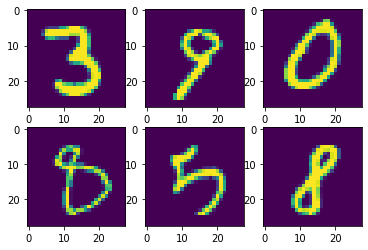

In [11]:
fig, axes = plt.subplots(2,3)
# Imprime 3 datos que la red predijo correctamente
axes[0,0].imshow(correct_img[0].view(28,28))
axes[0,1].imshow(correct_img[1].view(28,28))
axes[0,2].imshow(correct_img[2].view(28,28))
# Imprime 3 datos donde la red falla
axes[1,0].imshow(incorrect_img[0].view(28,28))
axes[1,1].imshow(incorrect_img[8].view(28,28))
axes[1,2].imshow(incorrect_img[5].view(28,28))